In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate,cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

# Data Set

<i><b>Sursă dataset:</b></i>: <a href="https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences">Sentiment Labelled Sentences Data Set </a>

<i><b>Scurta decriere:</b></i>
Baza de date contine fraze furnizate de utilizatori si etichetate ca fiind cu valenta pozitiva sau negativa.
Setul este alcatuit din trei subseturi fiecare avand 500 de fraze cu valenta pozitiva si 500 cu valenta negtive.

Siturile de unde au fost preluate datele din subseturi


<ul>
  <li>imdb.com</li>
  <li>amazon.com</li>
  <li>yelp.com</li>
</ul>




<i><b>Citare relevanta:</b></i>
'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015



# Loading data

In [4]:
#Se incarca trei seturi cu date categoriale, ulterior se concateneza intr-un singur data frame 

header = ['Comment', 'Class']
data_set1 = pd.read_csv("./Datasets/amazon_cells_labelled.txt", names=header, sep='\t')
data_set2 = pd.read_csv("./Datasets/imdb_labelled.txt", names=header, sep='\t')
data_set3 = pd.read_csv("./Datasets/yelp_labelled.txt", names=header, sep='\t') 
data_sentiment_labelled=pd.DataFrame()
data_sentiment_labelled=data_sentiment_labelled.append([data_set1,data_set2,data_set3],ignore_index=True)


display(data_sentiment_labelled)

,Comment,Class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


# Tokenizing Data

In [5]:
#Se realizeaza tokenizarea datasetului
vect = CountVectorizer()
vect.fit(data_sentiment_labelled.iloc[:, 0])
display(vect.vocabulary_)

vect_fit = vect.fit_transform(data_sentiment_labelled.iloc[:, 0])


{'so': 4161,
 'there': 4545,
 'is': 2427,
 'no': 3043,
 'way': 4987,
 'for': 1829,
 'me': 2809,
 'to': 4609,
 'plug': 3387,
 'it': 2432,
 'in': 2314,
 'here': 2158,
 'the': 4531,
 'us': 4835,
 'unless': 4793,
 'go': 1982,
 'by': 647,
 'converter': 1013,
 'good': 1993,
 'case': 713,
 'excellent': 1603,
 'value': 4861,
 'great': 2023,
 'jawbone': 2449,
 'tied': 4589,
 'charger': 768,
 'conversations': 1012,
 'lasting': 2567,
 'more': 2931,
 'than': 4526,
 '45': 45,
 'minutes': 2890,
 'major': 2753,
 'problems': 3482,
 'mic': 2868,
 'have': 2113,
 'jiggle': 2464,
 'get': 1954,
 'line': 2648,
 'up': 4821,
 'right': 3777,
 'decent': 1171,
 'volume': 4928,
 'if': 2282,
 'you': 5138,
 'several': 4004,
 'dozen': 1373,
 'or': 3144,
 'hundred': 2259,
 'contacts': 987,
 'then': 4542,
 'imagine': 2294,
 'fun': 1901,
 'of': 3097,
 'sending': 3968,
 'each': 1440,
 'them': 4538,
 'one': 3124,
 'are': 273,
 'razr': 3611,
 'owner': 3200,
 'must': 2980,
 'this': 4558,
 'needless': 3010,
 'say': 3889,
 '

# Showing Statistics

In [6]:
#Se afiseaza numarul de cuvinte distincte din data set
print(f'Număr de cuvinte distincte: {len(vect.vocabulary_)}')


Număr de cuvinte distincte: 5155


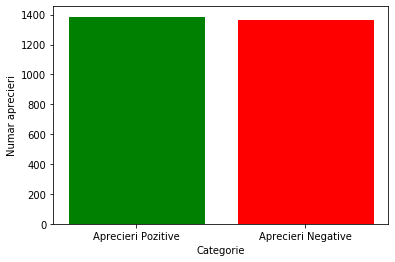

In [7]:
#Se reprezinta grafic numarul aprecierilor pozitive si a celor negative 

hist_x = ['Aprecieri Pozitive', 'Aprecieri Negative']; 
hist_y = [data_sentiment_labelled[data_sentiment_labelled.Class == 1].count()['Class'], data_sentiment_labelled[data_sentiment_labelled.Class == 0].count()['Class']]

barlist = plt.bar(hist_x, hist_y, align='center')
barlist[0].set_color('g')
barlist[1].set_color('r')
plt.xlabel('Categorie')
plt.ylabel('Numar aprecieri')
plt.show()

Cel mai scurt cuvânt: so, 2 caractere
Cel mai lung cuvânt: waaaaaayyyyyyyyyy, 17 caractere
Lungimea medie: 6.57 caractere


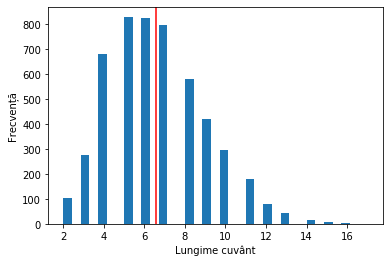

In [8]:

sorrted_words=sorted(vect.vocabulary_.items(), key = lambda item: len(item[0]))

shortest_word = sorrted_words[0]
longest_word = sorrted_words[-1]
print(f'Cel mai scurt cuvânt: {shortest_word[0]}, {len(shortest_word[0])} caractere')
print(f'Cel mai lung cuvânt: {longest_word[0]}, {len(longest_word[0])} caractere')
word_lengths = [len(item) for item in vect.get_feature_names()]
print(f'Lungimea medie: {round(np.mean(word_lengths), 2)} caractere')
plt.hist(word_lengths, bins=35)
plt.xlabel('Lungime cuvânt'); plt.ylabel('Frecvență')
plt.axvline(np.mean(word_lengths), color='r')
plt.show()




In [9]:
#Se afiseaza frecventa de aparitie a primelor n cuvinte 
k = 50
word_list  = vect.get_feature_names()
count_list = vect_fit.toarray().sum(axis=0)
word_freq = pd.DataFrame(count_list, index=word_list)
word_freq.columns = ['Frecvență']
display(HTML(f'<i>Cele mai frecvente {k} {"de" if (k >= 20) else ""} cuvinte: </i>'))
word_freq_desc = word_freq.sort_values(by='Frecvență', ascending=False)[:k]
display(word_freq_desc)

,Frecvență
the,1953
and,1138
it,789
is,754
to,670
this,643
of,624
was,571
in,400
for,336


# Processing Data

### Removing words without meaning 

In [10]:

#Constatam ca nu toate cuvintele din data setul prezent sunt cuvinte cu sens 
feature_names = vect.get_feature_names()
print(feature_names[:70])

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah']


In [11]:
#Stergem din DataSetul initial cuvintele care contin numere
import re
pattern = re.compile('\d')
data_sentiment_labelled['Comment'] = data_sentiment_labelled.Comment.str.replace(pattern , '')

In [12]:
#Se afiseaza numarul de cuvinte dupa prelucrare
vect = CountVectorizer()
vect_fit = vect.fit_transform(data_sentiment_labelled.iloc[:, 0])
print(f'Număr de cuvinte: {len(vect.vocabulary_)}')

Număr de cuvinte: 5073


### Removing Stopwords

In [13]:
print(len(ENGLISH_STOP_WORDS))

318


In [14]:
for stopword in ENGLISH_STOP_WORDS:
    data_sentiment_labelled['Comment'] = data_sentiment_labelled.Comment.str.replace(stopword, '')

vect = CountVectorizer()
vect_fit = vect.fit_transform(data_sentiment_labelled.iloc[:, 0])
#print(vect_fit)
print(f'Număr de cuvinte ramase: {len(vect.vocabulary_)}')

Număr de cuvinte ramase: 4046


# Models

In [15]:
X_train = vect.fit_transform(data_sentiment_labelled.iloc[:, 0])
y_train = data_sentiment_labelled.values[:, -1]

print(X_train.shape)
print(y_train.shape)
y_train= y_train.astype('int32')


(2748, 4046)
(2748,)


dtype('int64')

# K-Nearest Neighbors Classifier

In [16]:
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_train)

pipe = Pipeline([('knn', KNeighborsClassifier(metric='euclidean'))])
parameter_grid = { 'knn__n_neighbors': list(range(1, 10)), 'knn__p': list(range(1, 5)) }

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search =GridSearchCV(pipe, param_grid=parameter_grid, scoring='f1')
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_validate(grid_search, X_scaled, y_train, cv=strat_k_fold, scoring=['f1', 'accuracy'], return_train_score=True )


score_knn = pd.DataFrame({'Model_name': 'K-Nearest Neighbors Classifier', 'Fold': np.arange(1, 6), 'Search_strategy': 'GridSearchCV'})
score_knn = pd.concat([score_knn,pd.DataFrame(scores)], axis=1)
display(score_knn)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,K-Nearest Neighbors Classifier,1,GridSearchCV,11.078895,0.084342,0.665706,0.755202,0.578182,0.705641
1,K-Nearest Neighbors Classifier,2,GridSearchCV,10.977587,0.084339,0.672365,0.762847,0.581818,0.716561
2,K-Nearest Neighbors Classifier,3,GridSearchCV,11.477634,0.074857,0.691928,0.995052,0.660000,0.994995
3,K-Nearest Neighbors Classifier,4,GridSearchCV,11.351377,0.075356,0.688666,0.801098,0.604736,0.769441
4,K-Nearest Neighbors Classifier,5,GridSearchCV,11.422740,0.078350,0.674591,0.794187,0.601093,0.761710


# Decision Tree Classifier

In [17]:
pipe = Pipeline([('dtc', DecisionTreeClassifier())])
parameter_grid = { 'dtc__criterion': ['gini', 'entropy'],'dtc__splitter': ['best', 'random'] }

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search =GridSearchCV(pipe, param_grid=parameter_grid, scoring='f1')
scores = cross_validate(grid_search, X_train, y_train, cv=strat_k_fold, scoring=['f1', 'accuracy'], return_train_score=True )

score_decision_tree = pd.DataFrame({'Model_name': 'DecisionTreeClassifier', 'Fold': np.arange(1, 6), 'Search_strategy': 'GridSearchCV'})
score_decision_tree = pd.concat([score_decision_tree,pd.DataFrame(scores)], axis=1)
display(score_decision_tree)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,DecisionTreeClassifier,1,GridSearchCV,4.678589,0.002992,0.681648,0.995929,0.690909,0.995905
1,DecisionTreeClassifier,2,GridSearchCV,4.786382,0.002992,0.720000,0.997292,0.720000,0.997270
2,DecisionTreeClassifier,3,GridSearchCV,4.527877,0.002993,0.706714,0.995929,0.698182,0.995905
3,DecisionTreeClassifier,4,GridSearchCV,4.578777,0.002994,0.680412,0.995948,0.661202,0.995907
4,DecisionTreeClassifier,5,GridSearchCV,4.318274,0.002995,0.684211,0.995483,0.693989,0.995452


# Random Forest Clasifier

In [30]:
pipe = Pipeline([('rfc', RandomForestClassifier())])
parameter_grid = {'rfc__criterion': ['gini', 'entropy']} 

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search =GridSearchCV(pipe, param_grid=parameter_grid, scoring='f1')
scores = cross_validate(grid_search, X_train, y_train, cv=strat_k_fold, scoring=['f1', 'accuracy'], return_train_score=True )

score_rfc = pd.DataFrame({'Model_name': 'RandomForestClassifier', 'Fold': np.arange(1, 6), 'Search_strategy': 'GridSearchCV'})
score_rfc = pd.concat([score_rfc,pd.DataFrame(scores)], axis=1)
display(score_rfc)


,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,RandomForestClassifier,1,GridSearchCV,38.374612,0.064379,0.772803,0.995951,0.750909,0.995905
1,RandomForestClassifier,2,GridSearchCV,38.077652,0.066873,0.742049,0.995491,0.734545,0.995450
2,RandomForestClassifier,3,GridSearchCV,37.908449,0.073361,0.738137,0.996387,0.729091,0.996360
3,RandomForestClassifier,4,GridSearchCV,38.394619,0.068875,0.760563,0.996400,0.752277,0.996362
4,RandomForestClassifier,5,GridSearchCV,39.007618,0.066377,0.760070,0.996400,0.750455,0.996362


# Gaussian Naive Bayes Classifier

In [27]:
pipe = Pipeline([('gnb', GaussianNB())])
parameter_grid = {'gnb__var_smoothing': np.linspace(start=1e-9, stop=1e-2, num=100)} 

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = RandomizedSearchCV(pipe, param_distributions=parameter_grid, scoring='f1')
scores = cross_validate(grid_search, X_train.toarray(), y_train, cv=strat_k_fold, scoring=['f1', 'accuracy'], return_train_score=True )

score_gnb = pd.DataFrame({'Model_name': 'RandomForestClassifier', 'Fold': np.arange(1, 6), 'Search_strategy': 'GridSearchCV'})
score_gnb = pd.concat([score_gnb,pd.DataFrame(scores)], axis=1)
display(score_gnb)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,RandomForestClassifier,1,GridSearchCV,17.837227,0.104801,0.767123,0.918966,0.752727,0.914468
1,RandomForestClassifier,2,GridSearchCV,17.304225,0.106798,0.728889,0.863224,0.667273,0.842129
2,RandomForestClassifier,3,GridSearchCV,17.414503,0.104803,0.754414,0.902707,0.721818,0.895359
3,RandomForestClassifier,4,GridSearchCV,17.621102,0.106300,0.738275,0.887444,0.684882,0.874034
4,RandomForestClassifier,5,GridSearchCV,17.985898,0.100309,0.743750,0.891903,0.701275,0.880400


# Create Report

In [32]:

data_model_report=pd.DataFrame()
data_model_report=data_model_report.append([score_knn, score_decision_tree,score_rfc, score_gnb],ignore_index=True)
display(data_model_report)


,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,K-Nearest Neighbors Classifier,1,GridSearchCV,11.078895,0.084342,0.665706,0.755202,0.578182,0.705641
1,K-Nearest Neighbors Classifier,2,GridSearchCV,10.977587,0.084339,0.672365,0.762847,0.581818,0.716561
2,K-Nearest Neighbors Classifier,3,GridSearchCV,11.477634,0.074857,0.691928,0.995052,0.660000,0.994995
3,K-Nearest Neighbors Classifier,4,GridSearchCV,11.351377,0.075356,0.688666,0.801098,0.604736,0.769441
4,K-Nearest Neighbors Classifier,5,GridSearchCV,11.422740,0.078350,0.674591,0.794187,0.601093,0.761710
5,DecisionTreeClassifier,1,GridSearchCV,4.678589,0.002992,0.681648,0.995929,0.690909,0.995905
6,DecisionTreeClassifier,2,GridSearchCV,4.786382,0.002992,0.720000,0.997292,0.720000,0.997270
7,DecisionTreeClassifier,3,GridSearchCV,4.527877,0.002993,0.706714,0.995929,0.698182,0.995905
8,DecisionTreeClassifier,4,GridSearchCV,4.578777,0.002994,0.680412,0.995948,0.661202,0.995907
9,DecisionTreeClassifier,5,GridSearchCV,4.318274,0.002995,0.684211,0.995483,0.693989,0.995452


In [35]:
def highlight(s):
    is_max = s == s.max()
    is_min = s == s.min()
    styles = []
    for i in range(0, len(is_max)):
        if is_max[i]:
            styles.append('background-color: green')
        elif is_min[i]:
            styles.append('background-color: red')
        else:
            styles.append('')
    return styles

all_scores_styled = data_model_report.style.apply(highlight, subset=['test_f1','train_f1','test_accuracy','train_accuracy'])
display(all_scores_styled)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,K-Nearest Neighbors Classifier,1,GridSearchCV,11.078895,0.084342,0.665706,0.755202,0.578182,0.705641
1,K-Nearest Neighbors Classifier,2,GridSearchCV,10.977587,0.084339,0.672365,0.762847,0.581818,0.716561
2,K-Nearest Neighbors Classifier,3,GridSearchCV,11.477634,0.074857,0.691928,0.995052,0.660000,0.994995
3,K-Nearest Neighbors Classifier,4,GridSearchCV,11.351377,0.075356,0.688666,0.801098,0.604736,0.769441
4,K-Nearest Neighbors Classifier,5,GridSearchCV,11.422740,0.078350,0.674591,0.794187,0.601093,0.761710
5,DecisionTreeClassifier,1,GridSearchCV,4.678589,0.002992,0.681648,0.995929,0.690909,0.995905
6,DecisionTreeClassifier,2,GridSearchCV,4.786382,0.002992,0.720000,0.997292,0.720000,0.997270
7,DecisionTreeClassifier,3,GridSearchCV,4.527877,0.002993,0.706714,0.995929,0.698182,0.995905
8,DecisionTreeClassifier,4,GridSearchCV,4.578777,0.002994,0.680412,0.995948,0.661202,0.995907
9,DecisionTreeClassifier,5,GridSearchCV,4.318274,0.002995,0.684211,0.995483,0.693989,0.995452


In [37]:
html_str = """
<h1><u>SMS Spam Collection</u></h1>
"""
html_str = html_str + (all_scores_styled.render())
html_file = open("./Reports/data_sentiment_labelled.html", "w")
html_file.write(html_str)
html_file.close()